# <center>Data Mining Project Code</center>

** **
## <center>*01 - Exploratory Data Analysis Notebook*</center>

** **

Consumers today are becoming more selective about where they buy their products and where they spend their money. Consequently, it is essencial for companies to better understand their clients, being able to tailor sales and discounts to certain groups of customers.

Knowing this, the goal of this project is to divide customers of `ABCDEats Inc.` into smaller groups, whose clients have similar characteristics and purchasing behaviours.

The first notebook of this project consists of **Exploratory Data Analysis**, where we will explore and better understand our data. It is worth highlighting that in this notebook we will not address any issues that are here identified. This will be done in the following notebook.

This project was presented to the `TargetSphere Advisors`, a group of Consultants, Business Analysts and Data Scientists who focus on delivering Customer Segementation solutions for small and medium-sized businesses.

The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data)
    
    1.1 [Initial Exploration](#1.1-Initial-Exploration) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

    2.1 [Exploring the dataset structure](#2.1-Exploring-the-dataset-structure-with-**.info()**-method)
    
    2.2 [Descriptive statistics](#2.2-Descriptive-statistics)

    2.2.1 [Numerical Features](#2.1.1-Numerical-Features)

    2.2.2 [Categorical Features](#2.1.2-Categorical-Features)

    2.3 [Duplicate Records](#2.3-Duplicate-Records)
    
    2.5 [Coherence Checking](#2.5-Coherence-Checking)
    
    2.4 [Missing Data Analysis](#2.4-Missing-Data-Analysis)
    
    2.6 [Outlier Detection](#2.6-Outlier-Detection)
    
    2.5 [Feature Engineering](#2.5-Feature-Engineering)
    
    2.6 [Data Visualizations](#2.6-Data-Visualizations) <br><br>
    
3. [Data Export](#3.-Data-Export)


# 1. Importing Libraries & Data

In [1]:
# Data processing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Profile Report
from ydata_profiling import ProfileReport

# For missing values detection
import missingno as msno

# import external py file
import functions as f

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

The dataset will be loaded into a variable named `data`, with the `customer_id` column set as the index during the import process.

In [2]:
data = pd.read_csv('data/DM2425_ABCDEats_DATASET.csv', index_col = "customer_id")

The **display.max_columns** option controls the number of columns to be printed. By setting the **display.max_columns** option to **None**, Pandas will display all columns in the DataFrame.

In [3]:
# Show all columns of the dataset
pd.set_option('display.max_columns', None)

To take a first look into the data, it is used the **.head()** method, so that the five first rows of every feature in the dataset are displayed.

In [4]:
data.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Using the **.shape()** method we can check how many rows and columns the `data` dataset has.

In [5]:
print('The dataset has ', data.shape[0], ' rows and ', data.shape[1], ' columns.')

The dataset has  31888  rows and  55  columns.


<br>

### 1.1 Initial Exploration

After importing the data and necessary libraries, we decided to use a *Profile Report* to inicially explore our data.

This method allowed us to see that we have 55 variables, being 51 numeric and 4 categorical. This dataset is composed by 31888 rows, with 1998 missing cells. It also alerted us to the fact that **HR_0** is always constant, and that there are duplicate rows. Additionally, the alerts section also highlighted the existance of a high percentage of zeros in several variables across the dataset.


**Note**: We decided to leave this part commented since it takes about ~7 minutes to run and can lead to a laggy notebook. The main conclusions taken from the Profile Report are also here stated, so one does not need to run if they do not want to.

In [6]:
# profile = ProfileReport(
#     data, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

<br>

# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>


After using the Profile report, we decided to use some well-known methods for data exploration, such as the **describe()** and **info()** methods. <br>

With these we were able to check some basic statistics of our data, as well as the existing data types and the number of non-null rows. 
The later caught our attention, since there are some features with a different number of non-null rows, which is an indication that **Missing Values** are present.

<br>

### 2.1 Exploring the dataset structure with **.info()** method

The **.info()** method provides more information about the dataset, including the existence of missing values and the data type of the elements of each row.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

From the output above we can get some insights:

- some features have missing values, more precisely `customer_age`, `first_order` and `HR_0`;

- 52 features are numerical (18 continuous and 34 discrete) and 3 are categorical.

<br>

### 2.2 Descriptive statistics

By using the **describe()** method we get different statistical measurements, such as mean and standard deviation, for the various features. By examining these statistics, we can gain insights into the distribution of the data, helping to identify anomalies.

##### 2.1.1 Numerical Features

By default, the **.describe()** method focuses on the numerical features of the dataset. We will begin our analysis with these features to gain insights into their characteristics and distributions.

In [8]:
data.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

Observations:

- `customer_age`: the ages of customers range from a minimum of 15 to a maximum of 80. Interestingly, 75% of the customers are 31 years old or younger, indicating that the majority are young adults. The mean age is 27.51 years with a standard deviation of 7.16, meaning that there is some variation in ages, though most customers are relatively young;

- `vendor_count`: on average, customers order from 3 different vendors. The standard deviation is low, implying that most customers order from 1 to 4 unique vendors. The minimum vendor count is 0, suggesting that some customers never made a purchase. However, a few customers have interacted with a large number of vendors, with the maximum being 41;

- `product_count`: there are customers who haven’t ordered any products, as the minimum product count is zero. Half of the customers have ordered 2 or fewer products, and 75% have ordered 7 or fewer, indicating that most orders are relatively small. However, the maximum number of products ordered by a single customer is 269;

- `is_chain`: this variable is going to be considered as the number of times a customer has ordered from a chain restaurant. Some customers never ordered from chains, possibly because they never made an order at all. For 75% of customers, chain orders amount to 3 or fewer, while the maximum number of chain orders is 83. On average, customers placed almost 3 orders from chain restaurants;

- `first_order`: the earliest a customer placed their first order is day 0 (the dataset's starting date). This value could mean that either the customer never placed an order (if the "last_order" is also 0) or that they placed their first order on the day the dataset started. Only 25% of customers placed their first order within the first 7 days. On average, customers made their first order 28 days after the dataset began, but the high standard deviation of 24 days indicates a wide variety in order behavior. Some customers joined as late as day 90, meaning they are very new;

- `last_order`: the most recent a customer has placed an order is also day 0, which, similar to "first_order," depends on whether they ever made an order, if it is also 0, they never made a purchse, if its not zero it means that the customer made a purchase on the day the dataset was closed. The maximum number of days without making an order is 90. A quarter of customers made their most recent purchase within 49 days, and on average, customers placed their last order after 63.67 days. The large standard deviation also suggests the presence of sporadic users. These could be customers who made an initial order but haven't returned to the platform for a long time;

- Cuisine preferences: The most popular cuisines, in terms of spending, are Asian (mean = 9.96) and American (mean = 4.88);

- Days of the week: thursday and saturday show slightly higher average orders.

- Hour of the day: There is a noticeable spike in orders during typical lunch time (HR_11 to HR_13) and snack time (HR_16 to HR_18). Activity during late-night and early-morning hours (HR_0 to HR_7) is significantly lower, as expected. It is interesting to see that none of the customers made a purchase at midnight.

<br>

##### 2.1.2 Categorical Features


Next, we will analyze the statistics for the categorical data. To do this, we will use the **include** parameter and set it to **object**. This will generate a summary that includes the count of entries, the number of unique values, the most frequent value, and the frequency of that top value for each categorical column.

In [9]:
data.describe(include=object)

,customer_region,last_promo,payment_method
count,31888,31888,31888
unique,9,4,3
top,8670,-,CARD
freq,9761,16748,20161


To better understand the results, we will display the unique values for each categorical column.

In [10]:
for column in ['customer_region', 'last_promo', 'payment_method']:
    unique_values = data[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in customer_region: ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
Unique values in last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
Unique values in payment_method: ['DIGI' 'CASH' 'CARD']


Observations:

- the most common customer region is 8670, indicating it has the highest concentration of customers.

- The most frequent value for the last promotion category is the unknown category ('-').

- The payment method mostly used is card.

<br>

### 2.2 Duplicate Records

<a href="#top">Top &#129033;</a>


Before going deep into the data analysis, it is important to verify if there are any duplicate rows in the dataset. First, we will determine the total number of duplicated rows in the dataset, including all occurrences of each duplicate.

In [11]:
print(data[data.duplicated(keep=False)].shape[0])

120


Next, we will assess the number of duplicated rows while keeping only the first occurrence of each duplicate. This will help us understand how many unique duplicates exist.

In [12]:
print(data[data.duplicated(keep='first')].shape[0])

60


To gain further insight into the duplicated rows, we will display the first ten occurrences of these duplicates, using the **.head()** method.

In [13]:
data[data.duplicated(keep=False)].head(10)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
412c8c0b2d,2360,24.0,1,2,0,0.0,11,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,10.36,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4336560739,2360,24.0,1,2,0,0.0,11,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,10.36,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
11a56d6fbf,4660,32.0,3,4,3,1.0,43,-,CARD,10.15,0.00,0.00,0.0,0.0,0.00,0.00,0.0,6.29,0.00,14.73,0.0,0.00,0.0,0.0,4,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0
dcc76a0a1b,4660,32.0,3,4,3,1.0,43,-,CARD,10.15,0.00,0.00,0.0,0.0,0.00,0.00,0.0,6.29,0.00,14.73,0.0,0.00,0.0,0.0,4,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0
b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,3,2,3,1,1,0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,3,2,3,1,1,0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
839055942a,4660,25.0,4,5,5,3.0,69,-,CARD,11.59,0.00,0.00,0.0,0.0,0.00,0.00,0.0,3.21,0.00,8.85,0.0,0.00,0.0,0.0,0,0,1,1,1,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0
a59a79af83,4660,25.0,4,5,5,3.0,69,-,CARD,11.59,0.00,0.00,0.0,0.0,0.00,0.00,0.0,3.21,0.00,8.85,0.0,0.00,0.0,0.0,0,0,1,1,1,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0
8daf79a822,2360,29.0,11,39,24,3.0,75,DELIVERY,CARD,0.00,2.75,8.42,0.0,0.0,39.05,50.25,0.0,3.74,3.58,0.00,0.0,19.27,0.0,0.0,4,5,6,1,4,2,4,0.0,0,0,0,0,0,0,0,1,0,1,6,3,5,3,2,1,1,1,0,1,0,0,1


The analysis reveals that there are duplicated rows in the dataset, specifically identified by the same customer but with different indices (`customer_id`). To solve this issue, we can remove one of the duplicate entries. However, this data cleaning process will be conducted in a separate notebook that will focus on data pre-processing.

<br>

### 2.3 Missing Data Analysis

<a href="#top">Top &#129033;</a>

In our previous analysis, we identified that some columns contain missing values. To further investigate, we used the **.isna()** method to understand the exact number.

In [14]:
f.missing_value_summary(data)

,Unique Values,NaN Values,Percentage NaN
customer_age,66,727,2.279854
first_order,91,106,0.332413
HR_0,1,1165,3.653412


It is notable that the feature `HR_0` has 1165 missing values, which accounts for 3.65% of the dataset. Since this feature is univariate, discarding it could be considered as a potential option. Additionally, there are 727 rows missing customer age data, which represents 2.28% of the dataset, and 106 rows where the number of days since the first order is absent, corresponding to 0.33%.

We can visualize and analyse missing values by using the library ``missingno``. This library provides different visualizations, such as heatmaps and dendograms, that help us in identifying and understanding patterns of missingness in data. 

<br>

##### 2.4.1 `Missingno` Bar Chart

Below we have plotted the count of values per column, organized in descending order. This means that columns with the lowest values are positioned at the top, followed by those with higher counts.

<Axes: >

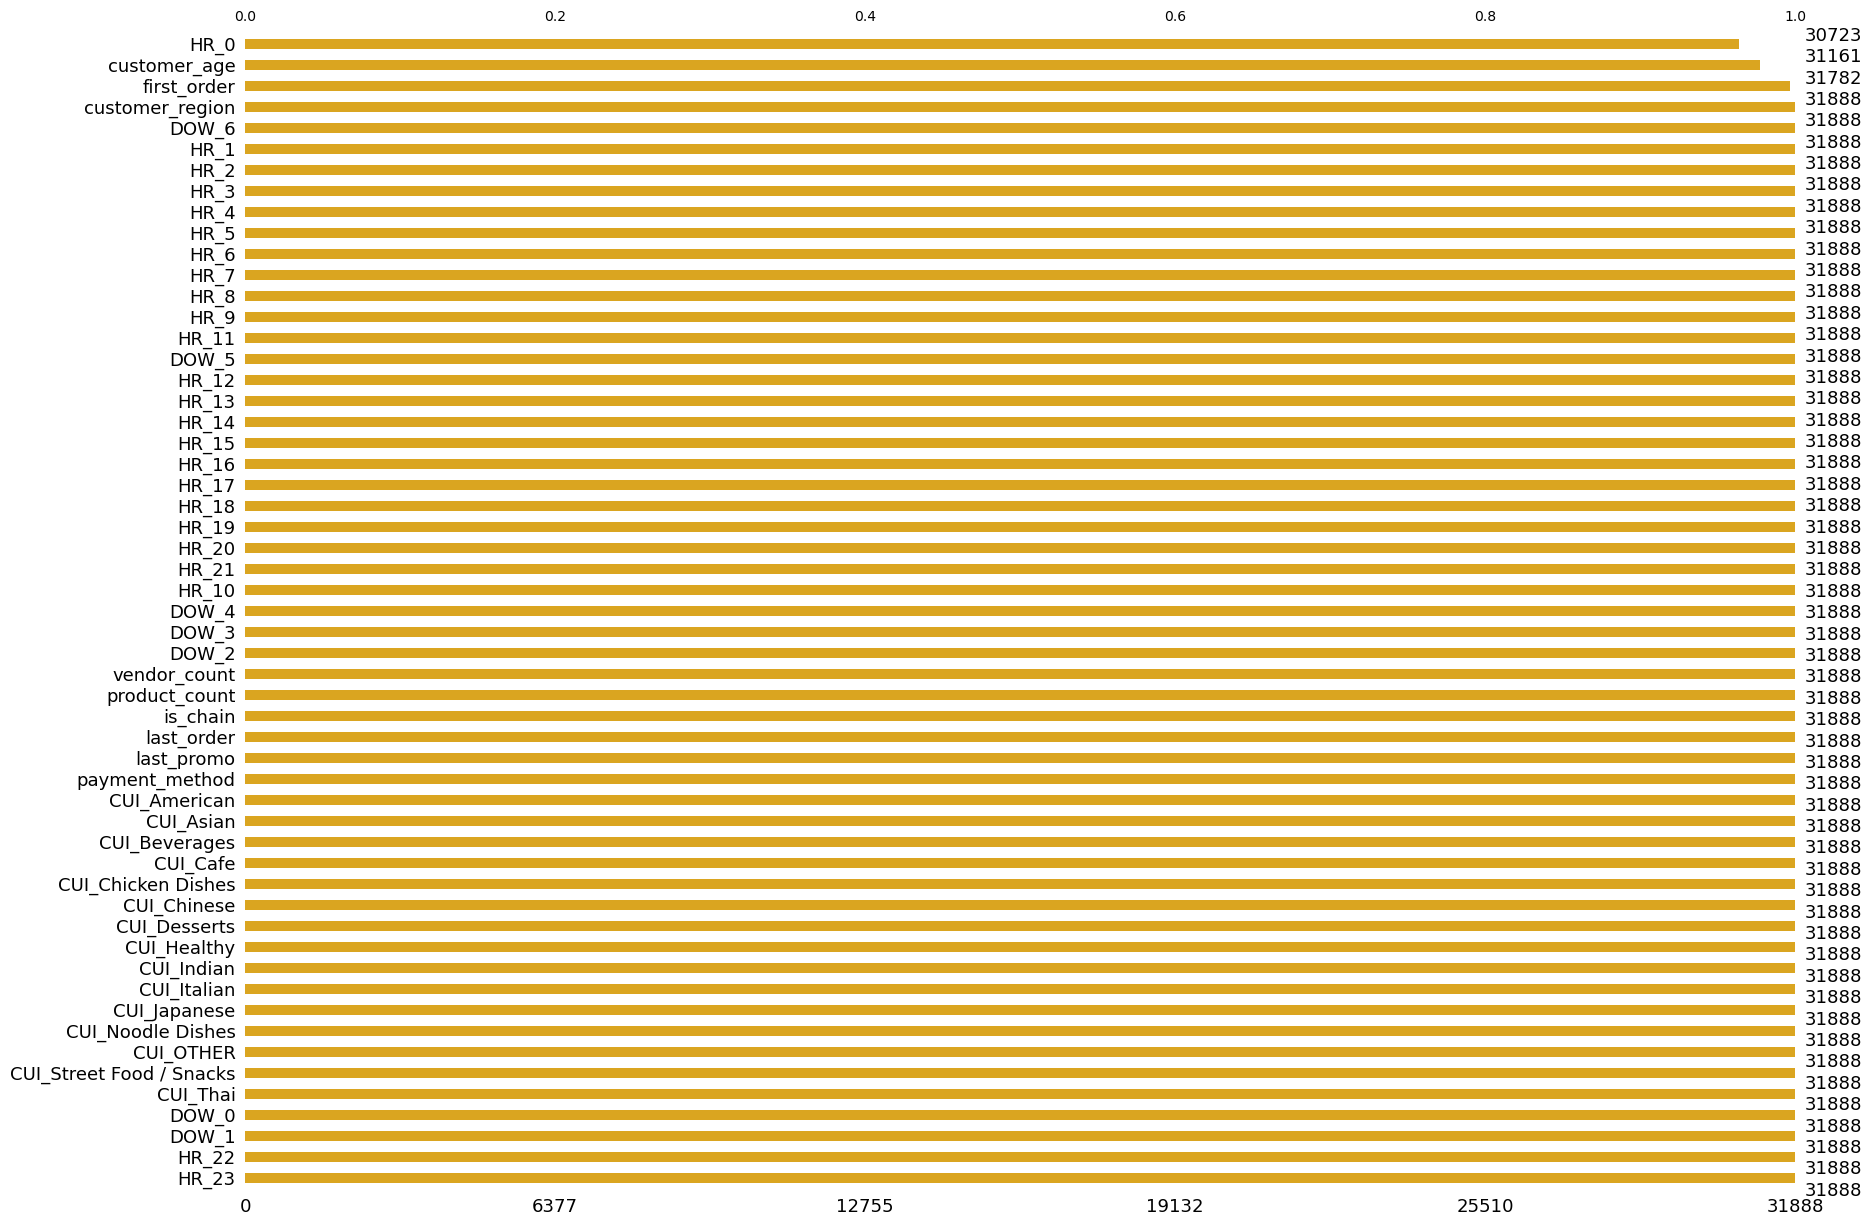

In [15]:
# Bar Chart
msno.bar(data, figsize=(20,15), fontsize=13, color='goldenrod', sort="descending")

As it can be seen and as mentioned previously, we can see that the columns ``HR_0``, ``customer_age`` and ``first_order`` exhibit missing values. These three variables have a relatively low percentage of missing data, with less than 5% of their values missing.

<br>

##### 2.4.2 `Missingno` Heatmap visualization
We can also use the ``missingno`` library to explore the relationships between missing values across column pairs. By analyzing the nullity correlation, we can identify columns whose missing data are either directly or inversely related. In this analysis, only columns with missing values are considered.

A nullity correlation value close to 1 indicates a strong positive relationship, meaning that if one column has a missing value, the other is likely to have one as well. On the other hand, a correlation value near -1 suggests a strong inverse relationship, where one column is missing values while the other is not. Values around zero indicate no significant correlation between the missing data in the two columns.

ValueError: could not convert string to float: '--'

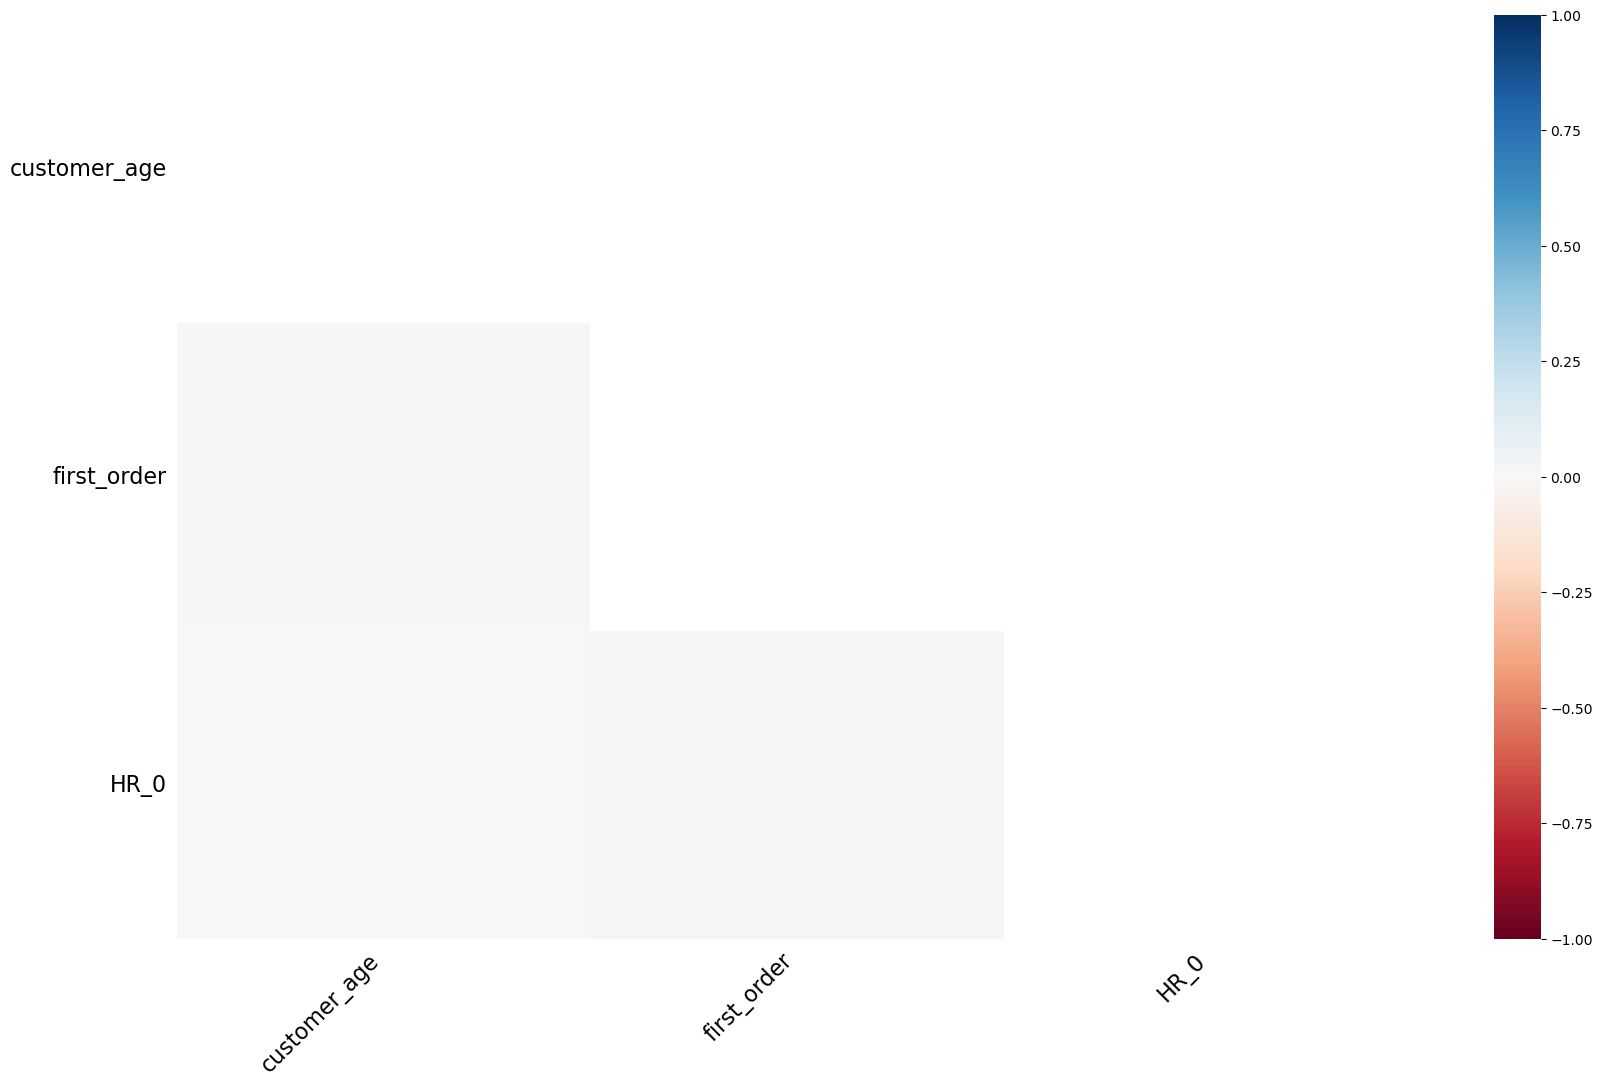

In [16]:
msno.heatmap(data)

From the visualization, it is clear that there is no direct correlation between any pair of the variables with missing values. The absence of displayed correlation values suggests that the correlation either is rounded to 0 (between -0.05 and 0.05) or is exactly 0. This indicates that the missing values in one column have no significant relationship with those in another, meaning the occurrence of missing data is likely independent across these variables - Missing Completely at Random (MCAR).

<br>

##### Analyzing customers with missing values through `customer_age`, `first_order`, and `HR_0`

To properly analyze the pairs of missing values in rows, we want to assess how often different combinations of columns have missing data. 

In [ ]:
missing_data = data[data["customer_age"].isna() & data["first_order"].isna() & data["HR_0"].isna()]
print(f"There are {missing_data.shape[0]} customer with incomplete values in 'customer_age', 'first_order' and 'HR_0'.")

In [ ]:
missing_customers_age_first_order = data[data["customer_age"].isna() & data["first_order"].isna()] 
print(f"There are {missing_customers_age_first_order.shape[0]} customer(s) with incomplete values in 'customer_age' and 'first_order'.")

In [ ]:
missing_first_order_HR_0 = data[data["first_order"].isna() & data["HR_0"].isna()] 
print(f"There are {missing_first_order_HR_0.shape[0]} customer(s) with incomplete values in 'first_order' and 'HR_0'.")

In [17]:
missing_customers_age_HR_0 = data[data["customer_age"].isna() & data["HR_0"].isna()]
print(f"There are {missing_customers_age_HR_0.shape[0]} customer(s) with incomplete values in 'customer_age' and 'HR_0'.")

There are 27 customer(s) with incomplete values in 'customer_age' and 'HR_0'.


In [18]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

# Output to notebook
output_notebook()

# Step 1: Create a DataFrame from the dictionary and sort it
counts = {
    "customer_age & first_order missing": missing_customers_age_first_order.shape[0],
    "first_order & HR_0 missing": missing_first_order_HR_0.shape[0],
    "customer_age & HR_0 missing": missing_customers_age_HR_0.shape[0],
    "All missing": missing_data.shape[0]
}

# Create a DataFrame from the dictionary
missing_counts_df = pd.DataFrame(list(counts.items()), columns=['Combination', 'Customer Count'])

# Sort the DataFrame by the number of customers
missing_counts_df = missing_counts_df.sort_values(by='Customer Count', ascending=False)

# Convert the DataFrame to ColumnDataSource for Bokeh
source = ColumnDataSource(missing_counts_df)

# Create the figure
p = figure(x_range=missing_counts_df['Combination'], height=400, title="Customer Counts by Missing Values Combinations",
           toolbar_location=None, tools="")

# Add vertical bars
p.vbar(x='Combination', top='Customer Count', width=0.9, source=source,
       line_color='white', fill_color='#35B778')

# Remove grid lines
p.xgrid.grid_line_color = None  
p.ygrid.grid_line_color = None

# Customize the chart
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2  # Rotate x-axis labels for readability
p.yaxis.axis_label = "Number of Customers"
p.xaxis.axis_label = "Missing Value Combinations"

# Display the plot
show(p)

Loading BokehJS ...

NameError: name 'missing_customers_age_first_order' is not defined

As observed in the previous heatmap, there is no significant relationship or pattern between the missingness of the variables analyzed. The bar plot above further illustrates this point, the missingness is just random. 

The highest rate of missingness occurs in the combination of `customer_age` and `HR_0`. Given that HR_0 is a univariate variable, its relevance may be minimal in the context of our analysis, and it can potentially be discarded.

It’s important to note that any strategies for handling data imputation will be addressed in a separate notebook.

In [19]:
data.isna().sum()

customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5                          0
DOW_6     

In [20]:
# completar - mediana
data[coluna].fillna(median)

NameError: name 'coluna' is not defined

<br>

### 2.5 Incoherence Checking

<a href="#top">Top &#129033;</a>


Another crucial step is to check for coherence in the data to ensure its quality. For instance, previously, we found users listed as 15 years old, which may indicate potential inconsistencies or errors, depending on the country we are in.

##### 2.5.1 Checking the customer's ages

The first feature we are going to analyze is the `customer_age`.

In [21]:
data['customer_age'].min()

15.0

As it can be seen from the output above there are users who are 15 years old. The next step is to determine how many there are.

In [22]:
print(f"There are {data[data['customer_age'] == 15].shape[0]} users who are 15 years old.")

There are 20 users who are 15 years old.


Now, let's see how many users in total are below 17 (including).

In [23]:
print(f"There are {data[data['customer_age'] < 18].shape[0]} users who are below 17 years old.")

There are 365 users who are below 17 years old.


There are several young customers with ages between 15 and 17 years old. Depending on the country, a minimum legal age to order deliveries may exist. As such, this variable should not be forgotten.

In [24]:
data['customer_age'].max()

80.0

Additionally, we also checked the oldest customer to verify that the ages were valid.

<br>

##### 2.5.2 Checking the number of unique vendors

Based on previous insights, we have identified that some customers had a count of unique vendors they ordered from equal to 0. Therefore, we will analyze the profiles of these customers to understand this behavior.

In [25]:
data['vendor_count'].min()

0

In [26]:
print(f"There are {data[data['vendor_count'] == 0].shape[0]} customers with a number of unique vendors equal to 0.")

There are 138 customers with a number of unique vendors equal to 0.


There are 138 customers with a count of unique vendors equal to 0. We will display the first 10 rows of this filtering.

In [27]:
data[data['vendor_count'] == 0].head(10)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5ccdf6c889,8670,25.0,0,0,0,3.0,3,DELIVERY,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
eff3f98046,8670,32.0,0,0,0,6.0,6,-,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376f896388,8670,29.0,0,0,1,7.0,7,DELIVERY,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8a7b681c19,8670,17.0,0,0,1,7.0,7,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Some customers did not order from any vendor and we can also see, by checking the dataframe above, they did not buy anything. This may be because our customers did not order anything in the last 3 months which our data refers to. However, it is interesting to see that they have values for the features `is_chain`, `first_order` and `last_order`.

<br>

##### 2.5.3 Checking the total number of ordered products

Next step is to analyse the feature `product_count`. In this way, we can get more insights between this feature and `vendor_count`.

In [28]:
data['product_count'].min()

0

In [29]:
data[data['product_count'] == 0]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28ed1f1e3f,8670,20.0,0,0,0,89.0,89,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Above, we found some customers that did not order anything in the last 3 months. The dataframe above, also bought to our attention that some customers did not order anything but they have a unique vendor.

<br>

*Checking the customers that did not buy anything but order from vendors*

In [30]:
print(f"There are {data[(data['product_count'] == 0) & (data['vendor_count'] != 0)].shape[0]} customers that did not buy anything, but order from vendors.")

There are 18 customers that did not buy anything, but order from vendors.


18 of our customers did not order anything but they have a vendor they ordered from in the last 3 months.

In [31]:
data[(data['product_count'] == 0) & (data['vendor_count'] != 0)].head(5)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aed85972bb,4660,27.0,1,0,0,6.0,6,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.56,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
b2ebe2e6e0,4660,43.0,1,0,0,6.0,6,-,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.74,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6f723d9894,4660,36.0,1,0,0,13.0,13,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.77,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9d74f2ac81,4660,27.0,1,0,0,19.0,19,DELIVERY,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.03,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
27b7eed8fa,4660,35.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.94,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


<br>

*Checking the customers that did buy products but did not order from vendors*

In [32]:
print(f"There are {data[((data['vendor_count'] == 0) & data['product_count'] != 0)].shape[0]} customer who did not order from a vendor, but have ordered products.")

There are 0 customer who did not order from a vendor, but have ordered products.


None of the customers have placed an order with the number of unique vendors equal to 0.

*Comparing the total number of products the customer has ordered with the sum of number of orders placed*

In [33]:
# Create a list of columns from the DataFrame that contain 'HR_'
hr_var = [column for column in data.columns if 'HR_' in column]

# Calculate the sum of the selected HR columns for each row in the DataFrame
sum_hr = data[hr_var].sum(axis=1)

In [34]:
data[data['product_count'] < sum_hr ]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aed85972bb,4660,27.0,1,0,0,6.0,6,DISCOUNT,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.56,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
b2ebe2e6e0,4660,43.0,1,0,0,6.0,6,-,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.74,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6f723d9894,4660,36.0,1,0,0,13.0,13,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.77,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9d74f2ac81,4660,27.0,1,0,0,19.0,19,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.03,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
27b7eed8fa,4660,35.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.94,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6c9e68b2e7,4660,22.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,22.24,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
c0b330c4df,4660,27.0,1,0,0,23.0,23,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14.42,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
68c4faeecb,4660,25.0,1,0,0,26.0,26,FREEBIE,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.75,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48e8abd5bf,4660,34.0,1,0,0,33.0,33,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.52,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0




<br>

##### 2.5.4 Checking `is_chain`

According to the metadata, this variable indicates whether the customer's orders was from a chain restaurant. However, our data is related to deliveries per customer in the last 3 months.

In [35]:
data['is_chain'].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80])

*Comparing `is_chain` with the number of unique vendors*

In [36]:
np.sort((data['is_chain'] - data['vendor_count']).unique())

array([-18, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
        -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  35,  37,  40,
        41,  44,  46,  53,  56,  73,  76])

After comparing the variable `is_chain` with the number of unique vendors, we can conclude that the first variable is not the number of unique chains that the customer ordered from but the number of times a customer ordered from chain restaurants.

# fiquei por aqui, verificar os que têm vendor count = 0 e product_count, mas têm valores no is_chain e outros

In [37]:
data[
    (data['vendor_count'] == 0) &
    (data['product_count'] >= 0) 
]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177ede2420,8670,30.0,0,0,1,86.0,86,-,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<br>

*Check the category of promotion or discount*

In [38]:
data['last_promo'].unique() 

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

In the variable `last_promo` we detected an two unkown categories, which are `DELIVERY` and `-`. In this, case, we assume that `DELIVERY` indicates that the customer did not order anything in promotion or discount in the last 3 months. As for `-`, we will explore a  more before reaching to a conclusion.

In [39]:
data[data['last_promo'] == '-']

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,5.88,0.00,1.53,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
dce8e4700a,8670,26.0,2,2,0,0.0,4,-,DIGI,0.00,23.62,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
f3070b7bbf,2360,21.0,2,2,2,0.0,4,-,CASH,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,9.9,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
7d9a62afd6,2440,27.0,2,3,2,0.0,5,-,DIGI,0.00,0.00,2.33,0.0,6.21,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e11a26e7ba,8670,28.0,1,1,0,NaN,0,-,CARD,0.00,6.13,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
e879afcc21,8670,41.0,1,1,0,NaN,0,-,CARD,0.00,0.00,0.00,0.0,0.00,0.0,6.22,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
f1ab8a54c4,4660,23.0,1,1,0,NaN,0,-,CARD,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,13.53,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


More than half of the customers have the unkown category. As such, we decided to assume that `-` has the same meaning as `DELIVERY`.

*Check the payment methods*

In [40]:
data['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

Above, we can see different payment methods.

*Check other possible incoherencies that have 0 as minimum*

In [41]:
numerical_df = data.loc[:,(data.dtypes != 'object') == True]

In [42]:
min_values = numerical_df.min()
min_values[min_values != 0]

customer_age    15.0
dtype: float64

All numerical variables have a minimum of 0, with `age` having a minimmum of 15.

*Checking days between first order and last order*

In [43]:
data['first_order'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       nan])

In [44]:
data['last_order'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

In [47]:
data[data['first_order'] > data['last_order']]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [47]:
data[data['first_order'].isna()]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0366fbb035,8670,24.0,1,1,0,NaN,0,-,DIGI,0.00,11.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
039d7c8a20,4660,23.0,1,1,0,NaN,0,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,14.49,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
04c9d25c93,8670,27.0,1,1,1,NaN,0,DISCOUNT,CASH,18.16,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
09118ae9e7,8670,36.0,1,1,0,NaN,0,-,CARD,0.00,6.02,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0d1f298bbd,4660,22.0,1,1,1,NaN,0,DISCOUNT,CASH,5.22,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2.4 Outliers

<a href="#top">Top &#129033;</a>


In [48]:
num_variables_array = np.array(numerical_df.columns)

In [49]:
num_variables_array

array(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'], dtype=object)

In [50]:
f.IQR_outliers(data, num_variables_array)

-------------------------------------
          Potential Outliers         
-------------------------------------
customer_age : Number of Outliers -> 159
  Outliers:  [56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73.
 74. 75. 76. 77. 78. 79. 80.]

vendor_count : Number of Outliers -> 369
  Outliers:  [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 40 41]

product_count : Number of Outliers -> 934
  Outliers:  [ 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  72  73  75  76  77  79
  80  81  82  83  84  87  88  89  91  94  95  97 109 110 117 269]

is_chain : Number of Outliers -> 1602
  Outliers:  [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 42 43 44 45 46 47 48 49 54 56 61 63 65 67 73 75 80
 81 83]

first_order : Number of Outliers -> 0

last_order : Num

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

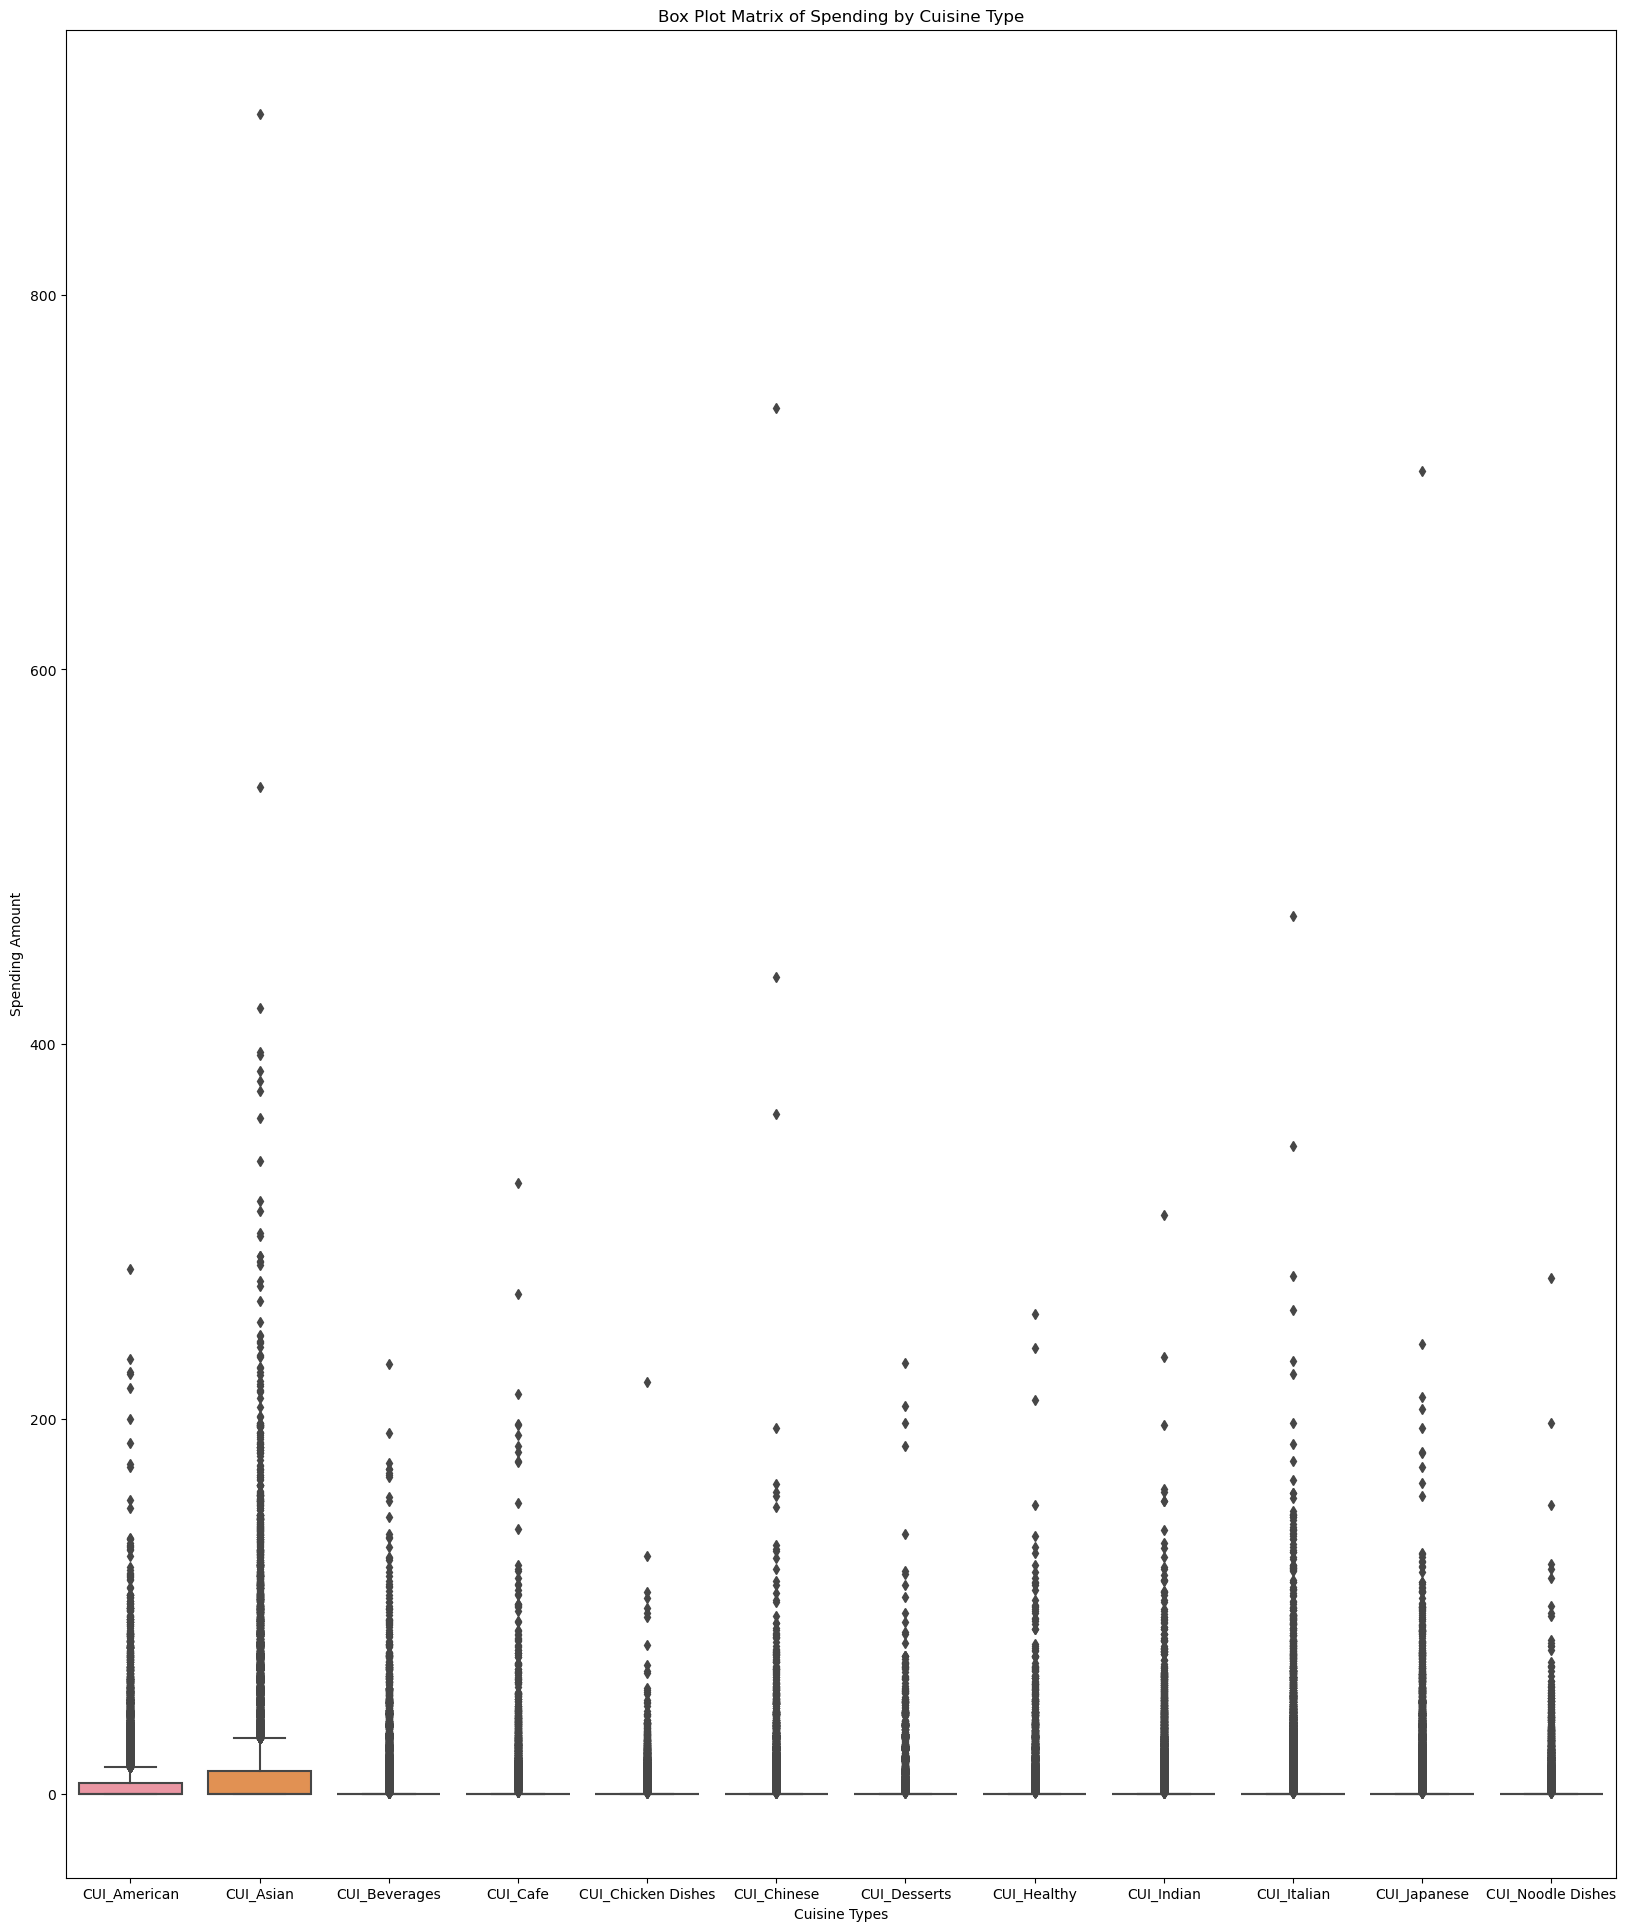

In [52]:
# Setting plot size for a matrix
plt.figure(figsize=(20, 24))

# Corrected list of columns with proper comma separation
sns.boxplot(data=data[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes", 
                       "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian", 
                       "CUI_Japanese", "CUI_Noodle Dishes"]])

# Add title and labels
plt.title('Box Plot Matrix of Spending by Cuisine Type')
plt.xlabel('Cuisine Types')
plt.ylabel('Spending Amount')

# Show the plot
plt.show()


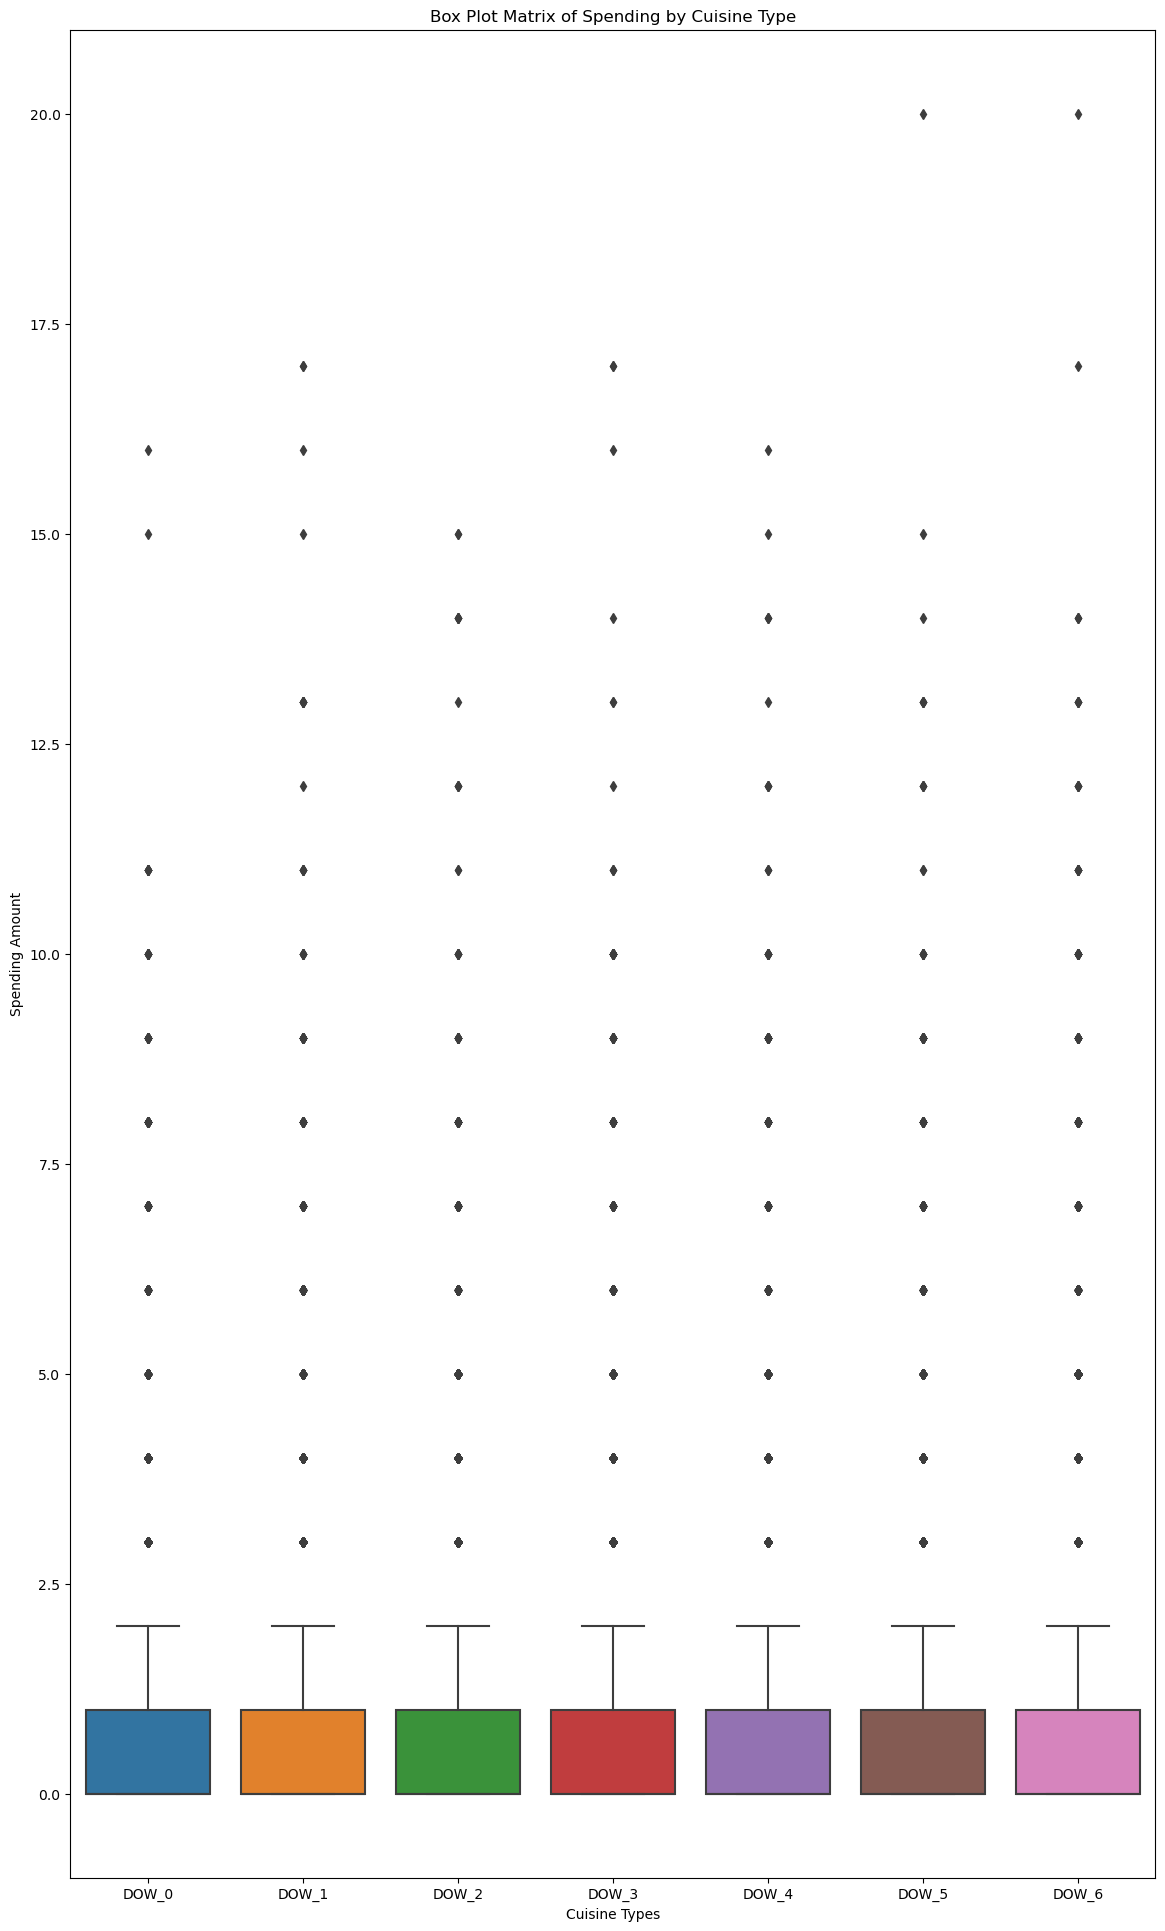

In [53]:
# Setting plot size for a matrix
plt.figure(figsize=(14, 24))

# Corrected list of columns with proper comma separation
sns.boxplot(data=data[["DOW_0", "DOW_1", "DOW_2", "DOW_3", "DOW_4", 
                       "DOW_5", "DOW_6"]])

# Add title and labels
plt.title('Box Plot Matrix of Spending by Cuisine Type')
plt.xlabel('Cuisine Types')
plt.ylabel('Spending Amount')

# Show the plot
plt.show()

In [54]:
def plot_multiple_boxes_with_outliers1(data, columns, ncols=2):
    """
    Plots box plots for specified columns in the DataFrame and highlights the outliers.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to plot.
    ncols (int): Number of columns in the subplot grid.
    """
    num_columns = len(columns)
    nrows = (num_columns + ncols - 1) // ncols  # Calculate the number of rows needed

    plt.figure(figsize=(8 * ncols, 4 * nrows))

    for i, column in enumerate(columns):
        # Calculate quartiles and IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

        # Create the box plot for the current column
        plt.subplot(nrows, ncols, i + 1)  # Create a subplot grid
        plt.boxplot(data[column], vert=False, widths=0.7,
                    patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'),
                    medianprops=dict(color='black'))

        # Scatter outliers
        plt.scatter(outliers, [1] * len(outliers), color='red', marker='o', label='Outliers')

        # Customize the plot
        plt.title(f'Box Plot of {column} with Outliers')
        plt.xlabel('Value')
        plt.yticks([])
        plt.legend()

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()

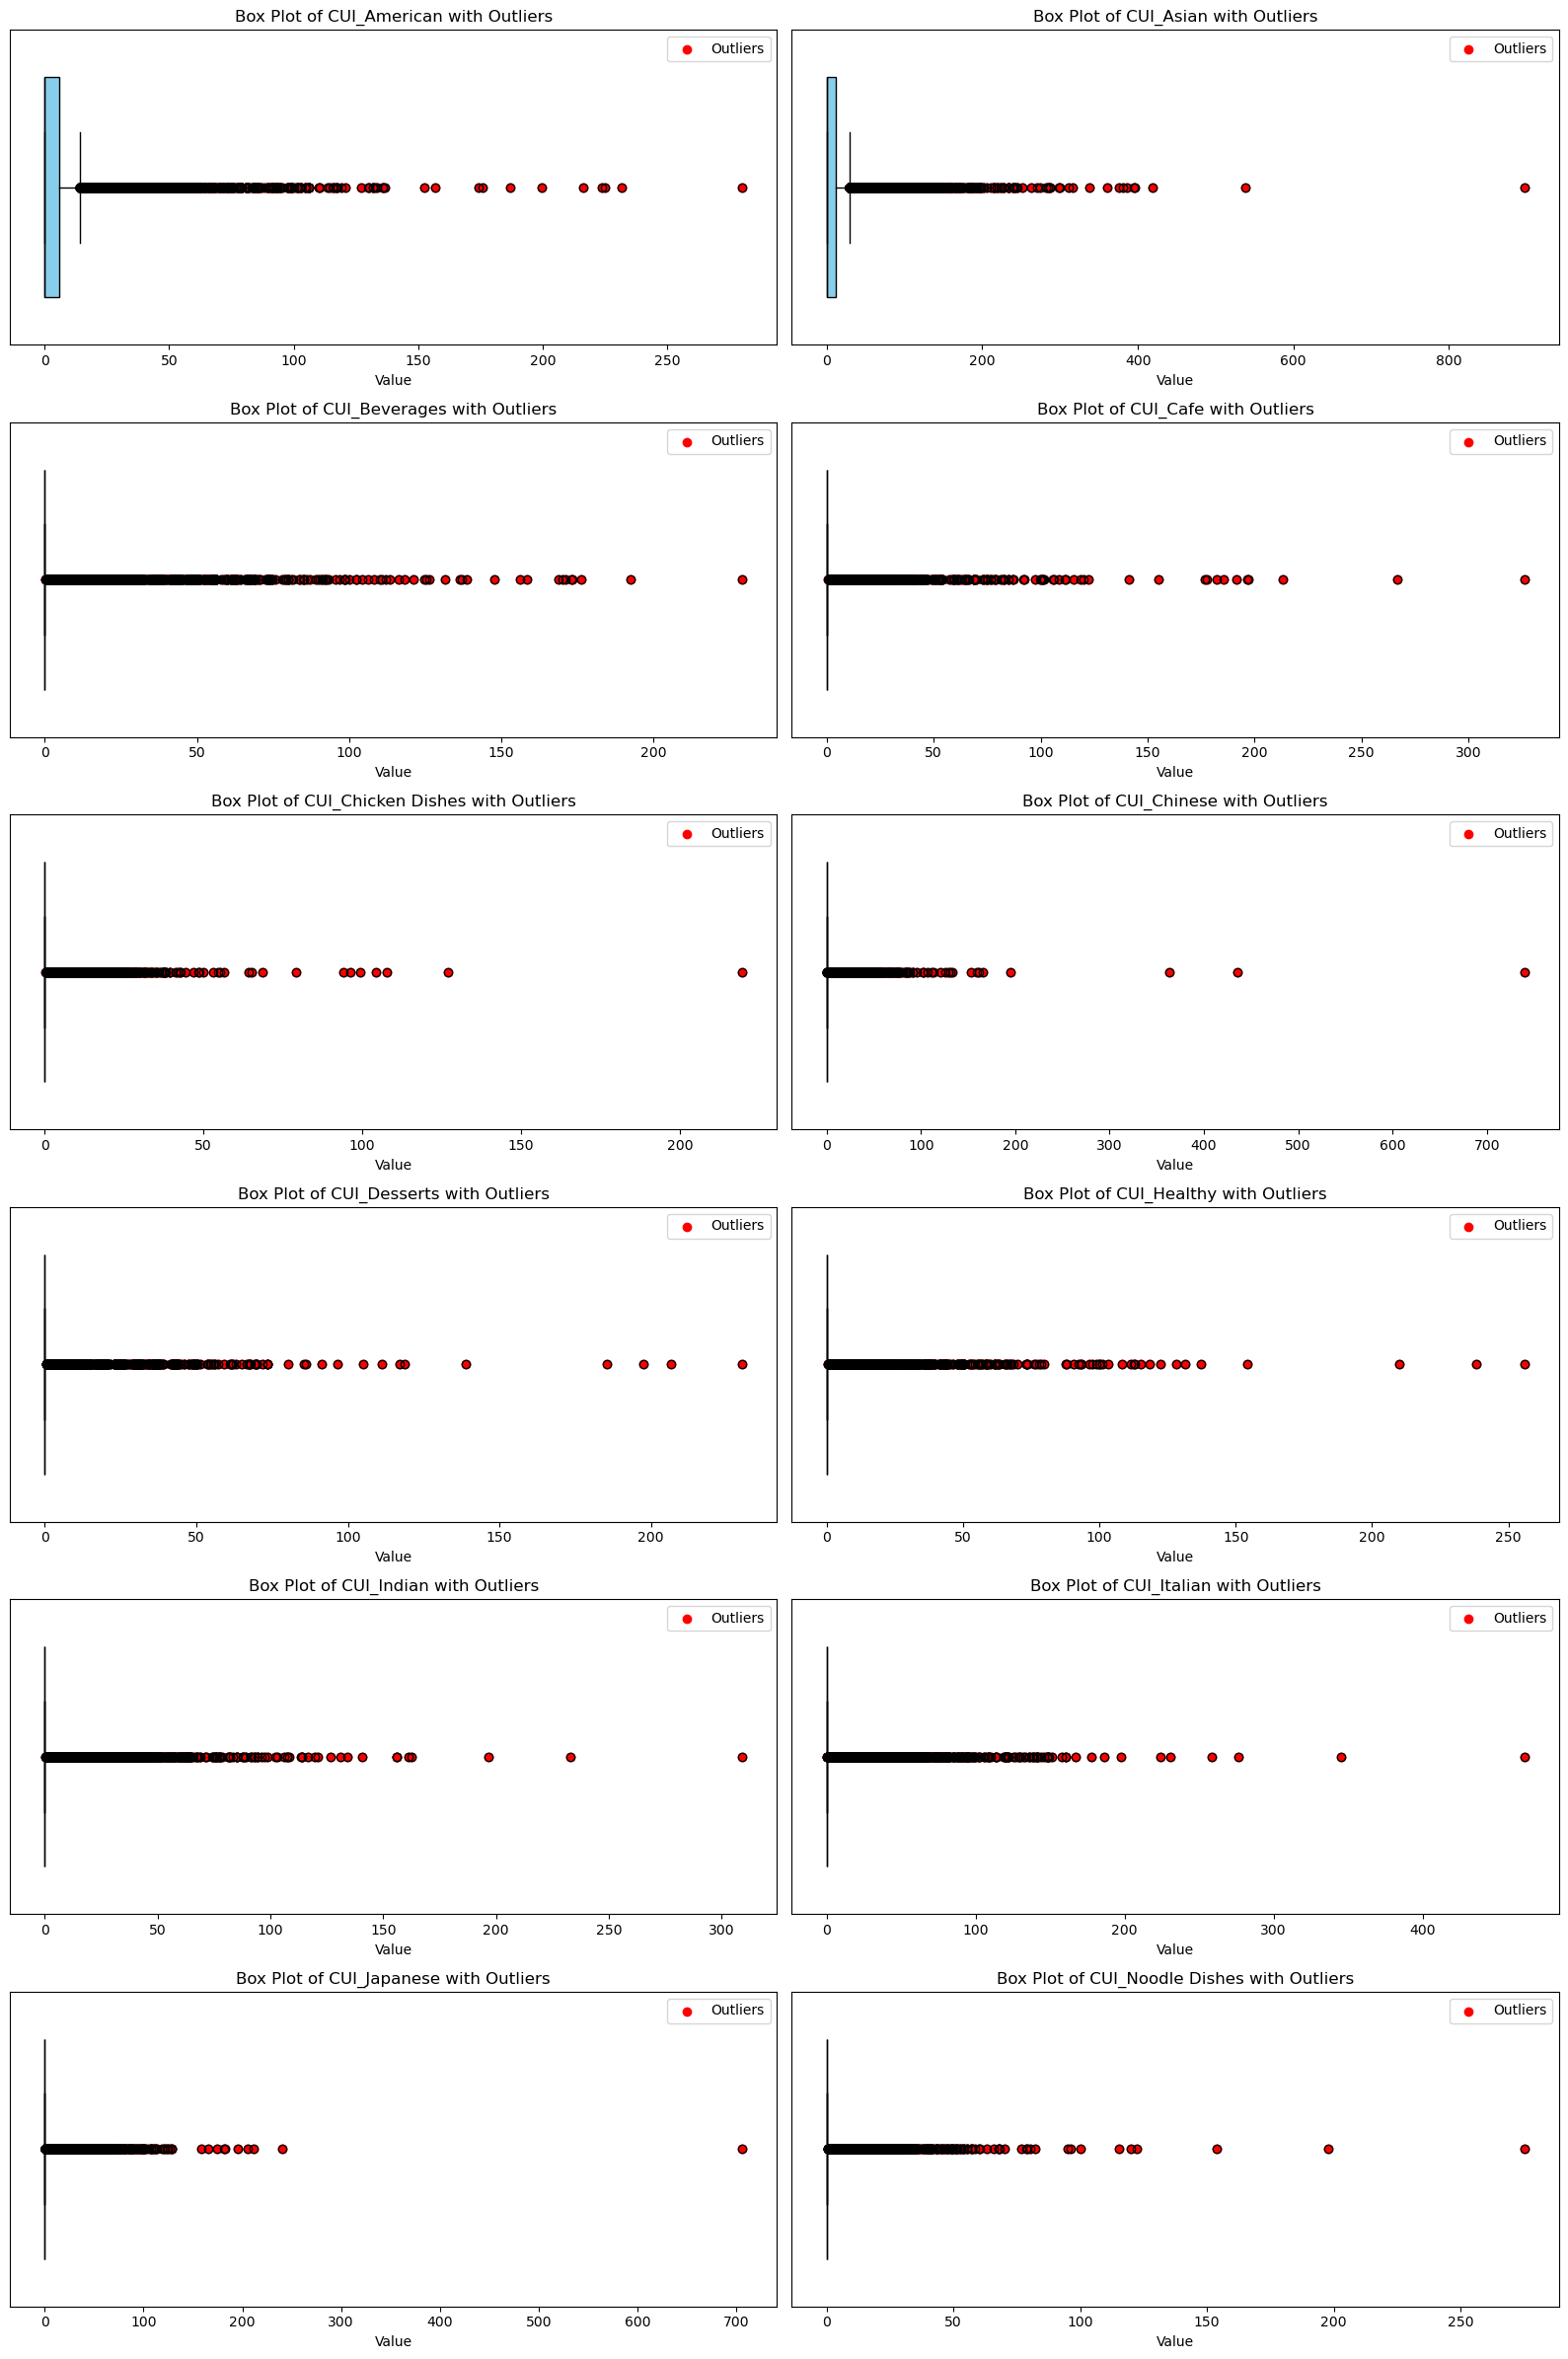

In [55]:
plot_multiple_boxes_with_outliers1(data, ["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes", 
                       "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian", 
                       "CUI_Japanese", "CUI_Noodle Dishes"])

## 2.5 Feature Engineering

<a href="#top">Top &#129033;</a>


In this step Feature Engineering will be performed. This consists of transforming existing variables, such as ``last_promo`` and ``payment_method``, and creating new variables from the existing ones, that we believe would add important information which will be useful in the Customer Segmentation part of the project.

Before doing so, we will have a look at how the dataset looks before these transformations.

In [56]:
# for column in data.columns:
    
#     if data[column].nunique() < 100:
        
#         print(f"Unique values in '{column}': {data[column].unique()}\n")

# TEMP
data = data.dropna()

In [57]:
data.head(3)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**Variable Transformation**

We noticed that ``first_order`` is saved as a float, whereas ``last_order`` is saved as an integer. Consequently, ``first_order`` will be saved as an integer, as we believe it makes more sense to do so. 

In [58]:
data['first_order'] = data['first_order'].astype(int)

The same thing will be done for HR_0, which should also be an integer

In [59]:
data['HR_0'] = data['HR_0'].astype(int)

**Dummy Columns**

In this subsection, we transformed the ``last_prom`` column, which contains categorical values representing different promotion types (DELIVERY, DISCOUNT, FREEBIE, and - ), into dummy variables. 

The same process was done for ``payment_method``, that represents payment types (CARD, CASH and DIGI).


This process, known as one-hot encoding, allows us to represent the categorical data in a binary format, suitable for Customer Segmentation processes.

Creating the dummy columns for ``last_prom``

In [60]:
promo_dummies = pd.get_dummies(data['last_promo'], 
                               prefix='promo', dummy_na=False)



Since the output consists of Boolean values, these are transformed into Binary representations (1/0)

In [61]:
promo_dummies = promo_dummies.astype(int)

Creating the dummy columns for ``payment_method``

In [62]:
payment_dummies = pd.get_dummies(data['payment_method'], 
                               prefix='pay', dummy_na=False)



Since the output consists of Boolean values, these are transformed into Binary representations (1/0)

In [63]:
payment_dummies = payment_dummies.astype(int)

Joining all the dummy columns to the dataset

In [64]:
data = pd.concat([data, promo_dummies, payment_dummies], axis=1)

However, having a column for each promotion type can be redundant. Since a customer can only have one promotion at a time, if promo_DELIVERY, promo_DISCOUNT and promo_FREEBIE are all 0, the only other option is *promo_-*. Therefore, the promo_- column can be dropped to avoid redundancy.

A similar approach was taken for the payment method, where the column *pay_DIGI* was dropped for the same reason, as its absence can be inferred from the other payment method columns.

This will also help to reduce the dimensionality of our dataset, which already has a high number of columns.

In [65]:
data = data.drop(['promo_-', 'pay_DIGI'], axis = 1)

**Variable Creation**

Here new features will be created based on the information that already exists in the dataset.

A brief description of all created variables follows:

*days_between* - number of days between the first and last transaction; <br>
*total_orders* - total number of orders placed;<br>
*avg_order_hour* - average hour at which each customers places an order; <br>
*total_spend* - total amount spent by each customer; <br>
*avg_spend_prod* - average amount of money spent per product; <br>
*is_repeat_customer* - verifies if the customer ordered more than once (1) or not (0).

*Days between the first and last transaction*

In [66]:
data['days_between'] = data['last_order'] - data['first_order']

*Total orders*

In [67]:
data['total_orders'] = data['DOW_0'] + data['DOW_1'] + data['DOW_2'] + data['DOW_3'] + data['DOW_4'] + data['DOW_5'] + data['DOW_6']

*Average hour for order placed*

In [68]:
hourly_orders = data.filter(like='HR_')


data['avg_order_hour'] = hourly_orders.apply(f.avg_hour, axis=1)


*Total Spend*

In [69]:
columns_to_sum = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
    'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
    'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 
    'CUI_Street Food / Snacks', 'CUI_Thai'
]


data['total_spend'] = data[columns_to_sum].sum(axis=1)


*Average Spend per Product*

In [70]:
data['avg_spend_prod'] = np.where(data['product_count'] > 0, 
                                   data['total_spend'] / data['product_count'], 
                                   0) 

*Customers that made more than 1 order*

In [71]:
data['is_repeat_customer'] = (data['days_between'] > 0).astype(int)

**Dimensionality Reduction**

With all the necessary transformations performed, we took a look at the shape of our dataset, where we noticed that there were 66 different features to work with. We thought that this could be an excessive amount of features which could lead to problems later in the project.

In [72]:
data.shape

(29920, 66)

Consequently, we decided that having a column for each hour of the day that an order was placed and every day of the week as a column was not necessary, and that these could be replaced by simpler features, whilst reducing the dimensionality. 

Consequently, we will transform the *days* columns into a column for the week days and another one for weekends. To do so we will sum the number of orders made in *DOW_0* and *DOW_6* (Sunday and Saturday), and the ones from *DOW_1* until *DOW_5*.

In [73]:
data['weekend_orders'] = data['DOW_0'] + data['DOW_6']
data['weekday_orders'] = data['DOW_1'] + data['DOW_2'] + data['DOW_3'] + data['DOW_4'] + data['DOW_5']

For the hour of the day features, we decided to take a look at their distribution before grouping them.

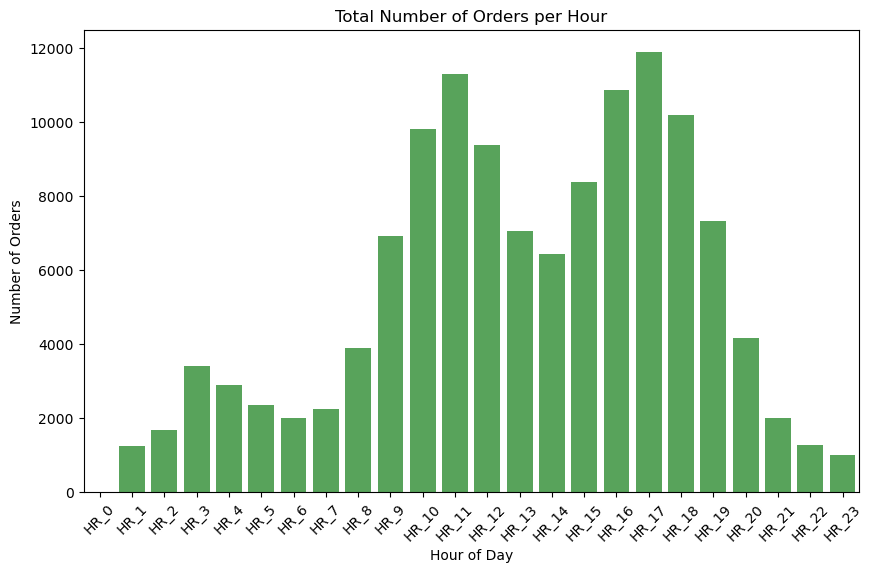

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

hour_columns = [f'HR_{i}' for i in range(24)]

# Sum of orders for each hour
orders_per_hour = data[hour_columns].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_per_hour.index, y=orders_per_hour.values,
           palette=['#4CAF50'] * len(orders_per_hour))
plt.title('Total Number of Orders per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
#plt.axvline(x=14.5, color='red', linestyle='--', linewidth=2)  # Customize the line
plt.show()

As we had previously stated, no orders were made at hour **HR_0**, therefore this feature will not be used in any of the groups. <br>

After looking at the *Orders Distribution per Hour* plot we can see that there are two clear peaks, one at 11h00 and another at 17h00. We decided to identify these as lunch and dinner times, even though in Portugal having lunch or dinner at these hours is a little early.



**NOT FINISHED**


group them as meal times. A description follows:

- 0h - 7h -  <br>
- 8h - 14h - <br>
- 15h - 19h - <br>
- 20h - 23h - <br>

In [76]:
data['late_night_snack'] = data['HR_0'] + data['HR_1'] + data['HR_2'] + data['HR_3'] + data['HR_4'] + data['HR_5']
data['breakfast'] = data['HR_6'] + data['HR_7'] + data['HR_8'] + data['HR_9'] + data['HR_10']
data['lunch'] = data['HR_11'] + data['HR_12'] + data['HR_13'] + data['HR_14'] + data['HR_15']
data['snack'] = data['HR_16'] + data['HR_17'] + data['HR_18']
data['dinner'] = data['HR_19'] + data['HR_20'] + data['HR_21'] + data['HR_22'] + data['HR_23']

Since the day of the week and hour features were transformed into new ones, they can be dropped.

In [77]:
data = data.drop(columns=[f'HR_{hour}' for hour in range(24)])
data = data.drop(columns=[f'DOW_{number}' for number in range(7)])

After all these transformations we must take a look at how the dataset looks before moving to the next section

In [79]:
data.head(5)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,promo_DELIVERY,promo_DISCOUNT,promo_FREEBIE,pay_CARD,pay_CASH,days_between,total_orders,avg_order_hour,total_spend,avg_spend_prod,is_repeat_customer,weekend_orders,weekday_orders,late_night_snack,breakfast,lunch,snack,dinner
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,2,18.0,28.88,5.776,1,2,0,0,0,0,2,0
5d272b9dcb,8670,17.0,2,2,2,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,2,10.5,19.21,9.605,1,2,0,0,1,1,0,0
f6d1b2ba63,4660,38.0,1,2,2,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,2,10.0,9.20,4.600,1,2,0,0,1,1,0,0
4eb37a6705,4660,20.0,2,5,0,0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2,2,8.5,55.44,11.088,1,1,1,0,2,0,0,0
6aef2b6726,8670,40.0,2,2,0,0,2,FREEBIE,DIGI,0.00,24.92,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,2,2,2.0,24.92,12.460,1,1,1,2,0,0,0,0


## 2.6 Visualisations

<a href="#top">Top &#129033;</a>

fazer bubble scatterplot para o total spend e 

**Customer Age Distribution**

In [83]:
from bokeh.io import output_notebook
output_notebook() 

Loading BokehJS ...

In [84]:
from bokeh.plotting import figure, show
import numpy as np

# Assuming 'data' is your DataFrame
hist, edges = np.histogram(data['customer_age'], bins=10)

p = figure(title="Customer Age Distribution", background_fill_color="#fafafa")
# Change fill_color to a green shade
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="#4CAF50", line_color="white", alpha=0.7)

p.xaxis.axis_label = 'Customer Age'
p.yaxis.axis_label = 'Frequency'

show(p)

In [85]:
# CORRIGIR CORES E COMMMENTS

from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource
from bokeh.palettes import Greens

# Summing up the cuisine preferences
cuisine_data = data[[
    'CUI_American', 'CUI_Asian',
    'CUI_Chinese','CUI_Indian', 'CUI_Italian', 
    'CUI_Japanese','CUI_OTHER', 
    'CUI_Thai'
]].sum()

cuisine_names = ['American', 'Asian', 'Italian', 
                 'Chinese', 'Indian',
                 'Japanese', 'Thai', 'Other']

source = ColumnDataSource(data=dict(cuisine=cuisine_names, counts=cuisine_data))

p = figure(x_range=cuisine_names, title="Cuisine Preferences", height=350)
p.vbar(x='cuisine', top='counts', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('cuisine', palette=Greens[8], factors=cuisine_names))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [86]:
meal_time_cols = ['breakfast', 'lunch', 'dinner', 'snack', 'late_night_snack']
meal_time_data = data[meal_time_cols].sum().reset_index(name='counts')

# Choose a palette with the same number of colors as the number of meal times (5 in this case)
palette = Greens[len(meal_time_cols)]  # Get 5 shades of green

# Add the colors to the meal_time_data DataFrame
meal_time_data['color'] = palette

# Create the plot
p = figure(x_range=meal_time_cols, height=350, title="Orders by Meal Time")

# Use the color column from the data source
source = ColumnDataSource(meal_time_data)

# Assign each bar a different color from the color column
p.vbar(x='index', top='counts', width=0.9, source=source, color='color')

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)


## 3. Export

<a href="#top">Top &#129033;</a>

As a final step in this notebook, we must export the treated dataset to be used in the next phase of the project.

In [ ]:
# data.to_csv('./new_data')